# Backtracking

Backtracking es una estrategia para encontrar la solución a un problema mediante un árbol de soluciones parciales. Si se encuentra la solución, el algoritmo se detiene. De lo contrario, se vuelve atrás de modo de examinar otras configuraciones.

El problema de las 8 Reinas es un problema combinatorial que generalmente se resuelve con backtracking. Se trata de ubicar 8 reinas en un tablero de ajedrez de $8 \times 8$. La restricción del problema es que ninguna reina puede estar en posición de atacar a las otras (en dirección vertical, horizontal o diagonal)

Para dos posiciones $(x_1,y_1)$ y $(x_2,y_2)$, podemos chequear las restricciones mediante las siguientes ecuaciones:

\begin{align}
x_1 &\neq x_2 \\
y_1 &\neq y_2 \\
\vert y_2-x_2 \vert &\neq \vert y_1-x_1 \vert \, \forall x_1 \neq x_2
\end{align}

Para el problema de las 8-reinas, es posible expresar la naturaleza combinatorial del problema contando el número de cadenas de 64-bits que contienen exactamente ocho 1s.

\begin{align}
{64\choose 8} = 4,426,165,368
\end{align}

Sin embargo la cantidad de soluciones posibles es solamente $92$. Es posible reducir la cantidad de tableros a generar si consideramos permutaciones $B=[0, 4, 7, 5, 2, 6, 1, 3]$ tal que el primer elemento contiene la posición de la primera reina en la primera fila.

En general, para el problema de las n-reinas, la cantidad de soluciones varía según la siguiente tabla.

|$n$| Cantidad de soluciones| 
|---|-------------|
| $1$ | $1$ |
| $2$  | $0$ |
|3 | $0$|
|$4$ | $2$|
|$5$ | $10$|
|$6$ | $4$|
|$7$ | $40$|
|$8$ | $92$|
|$9$ | $352$|
|$10$ | $724$|
|$11$ | $2680$|
|$12$ | $14200$|
|$13$ | $73712$|
|$14$ | $365596$|
|$15$ | $2279184$|
|$16$ | $14772512$|
|$17$ | $95815104$|
|$18$ | $666090624$|
|$19$ | $4968057848$|
|$20$ | $39029188884$|
|$21$ | $314666222712$|
|$22$ | $2691008701644$|
|$23$ | $24233937684440$|
|$24$ | $227514171973736$|
|$25$ | $2207893435808352$|
|$26$ | $22317699616364044$|



In [12]:
import itertools
import math 

def print_board(sol):
    N=len(sol)
    board = [[0]*N for _ in range(N)]
    for k in range(N):
        board[k][sol[k]]=1
    longest_cols = [
        (max([len(str(row[i])) for row in board]) + 3)
        for i in range(len(board[0]))
    ]
    row_format = "".join(["{:>" + str(longest_col) + "}" for longest_col in longest_cols])
    for row in board:
        print(row_format.format(*row))
    return board

def nqueens_permutation(N):
    S=itertools.permutations(range(N))
    solutions=[]
    for sol in S:
        #if (N == len(set(sol[i]+i for i in range(N))) == len(set(sol[i]-i for i in range(N)))):
        solutions.append(sol) 
    return solutions


B=nqueens_permutation(4)
for sol in B:
    print_board(sol)
    print '------------------'



   1   0   0   0
   0   1   0   0
   0   0   1   0
   0   0   0   1
------------------
   1   0   0   0
   0   1   0   0
   0   0   0   1
   0   0   1   0
------------------
   1   0   0   0
   0   0   1   0
   0   1   0   0
   0   0   0   1
------------------
   1   0   0   0
   0   0   1   0
   0   0   0   1
   0   1   0   0
------------------
   1   0   0   0
   0   0   0   1
   0   1   0   0
   0   0   1   0
------------------
   1   0   0   0
   0   0   0   1
   0   0   1   0
   0   1   0   0
------------------
   0   1   0   0
   1   0   0   0
   0   0   1   0
   0   0   0   1
------------------
   0   1   0   0
   1   0   0   0
   0   0   0   1
   0   0   1   0
------------------
   0   1   0   0
   0   0   1   0
   1   0   0   0
   0   0   0   1
------------------
   0   1   0   0
   0   0   1   0
   0   0   0   1
   1   0   0   0
------------------
   0   1   0   0
   0   0   0   1
   1   0   0   0
   0   0   1   0
------------------
   0   1   0   0
   0   0   0   1
   0   0 

# Algoritmo Backtracking para las n-reinas

    1) Comience en la columna hacia la izquierda
    2) Si todas las reinas están en posición devuelva Verdadero.
    3) Para cada fila en la columna seleccionada tratar:
        a) Si la reina puede ser posicionada en la posición [fila,columna], chequear recursivamente si esta posición lleva a una solución.
        b) Si la reina en la posición [fila,columna] lleva a una solución, devuelva Verdadero.
        c) Si la posición no lleva a una solución, devuelva a una posición anterior (Backtrack) y pruebe otras filas.
    3) Si se han probado todas las filas, devuelva Falso y comience Backtracking.

In [5]:
import copy 
import numpy as np

def is_safe(board): 
    N=board.shape[0]
    x,y=np.nonzero(board==1)
    perpendicular_restriction = lambda indexes : len(set(indexes))==len(indexes)
    diagonal_restriction = lambda indexes : (len(indexes) == len(set(indexes[i]+i for i in range(len(indexes)))) == len(set(indexes[i]-i for i in range(len(indexes)))))
    return perpendicular_restriction(x) & perpendicular_restriction(y)  & diagonal_restriction(y)
    
def child_nodes(board):
    N=board.shape[0]
    child=[]
    zero_rows=[i for i,k in enumerate(board.sum(axis=1)==0) if k]
    if len(zero_rows):
        min_row=min(zero_rows)
        for i in range(N):
            new_board=copy.deepcopy(board)
            new_board[min_row][i]=1
            child.append(new_board)
    return child

def nqueens_backtracking(N):
    sol = np.zeros((N,N))
    stack, path = [sol], []
    while stack:
        vertex = stack.pop()
        for old_vertex in path:
            if np.array_equal(vertex,old_vertex):
                continue
        path.append(vertex)
        for neighbor in child_nodes(vertex):
            #if is_safe(neighbor):
            stack.append(neighbor)
    return path

In [6]:
N=3
T=nqueens_backtracking(N)
check_feasible = lambda indexes,N : len(set(indexes))==N
for t in T:
    x,y=np.nonzero(t==1)
    print t,check_feasible(x,N)
    #    print t
    #    print '---------------------'

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] False
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]] False
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 0.]] False
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]] True
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]] True
[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]] True
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 0.]] False
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]] True
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]] True
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]] True
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 0.]] False
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]] True
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]] True
[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]] True
[[0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] False
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]] False
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]] True
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]] True
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]] True
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 0.]] False
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] True
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]] True
[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]] True
[[0. 1. 0.]
 [1. 0. 0.]
 [

In [30]:
import time
import pandas as pd

t_b=[]
t_p=[]

s_p=[]
s_b=[]

n_prob=[]

for n_size in range(4,10):
    start=time.clock()
    T=nqueens_backtracking(n_size)
    end=time.clock()
    t1=end-start
    t_b.append(t1)
    s_b.append(len(T))
    start=time.clock()
    B=nqueens_permutation(n_size)
    end=time.clock()
    t2=end-start
    t_p.append(t2)
    s_p.append(len(B))
    n_prob.append(n_size)
    
data_backtracking={'n':n_prob,'time':t_b,'mem':s_b,'method':['backtracking']*len(t_b)}
df_backtracking=pd.DataFrame(data_backtracking)
data_bruteforce={'n':n_prob,'time':t_p,'mem':s_p,'method':['brute_force']*len(t_p)}
df_bruteforce=pd.DataFrame(data_bruteforce)
df=pd.concat([df_bruteforce,df_backtracking],axis=0)


,mem,method,n,time
0,24,brute_force,4,0.000205
1,120,brute_force,5,0.000062
2,720,brute_force,6,0.000086
3,5040,brute_force,7,0.001019
4,40320,brute_force,8,0.008508
5,362880,brute_force,9,0.078096
0,17,backtracking,4,0.005990
1,54,backtracking,5,0.013010
2,153,backtracking,6,0.077187
3,552,backtracking,7,0.691943


In [31]:
df.head(30)

,mem,method,n,time
0,24,brute_force,4,0.000205
1,120,brute_force,5,0.000062
2,720,brute_force,6,0.000086
3,5040,brute_force,7,0.001019
4,40320,brute_force,8,0.008508
5,362880,brute_force,9,0.078096
0,17,backtracking,4,0.005990
1,54,backtracking,5,0.013010
2,153,backtracking,6,0.077187
3,552,backtracking,7,0.691943


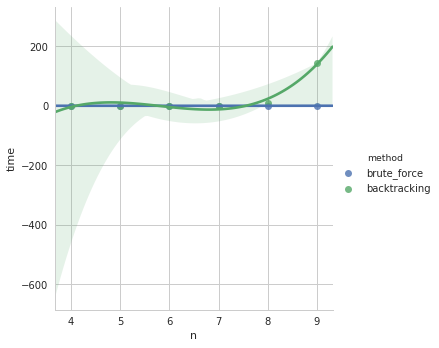

In [32]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

sns.lmplot(x="n", y="time", hue="method",order=3, data=df)
plt.show()

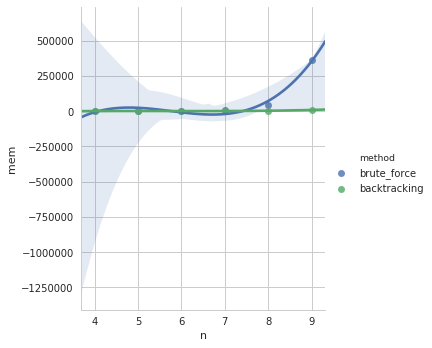

In [33]:
sns.lmplot(x="n", y="mem", hue="method",order=3, data=df)
plt.show()